<a href="https://colab.research.google.com/github/Nataliahfk/IA_aplicada_a_ciencia_de_datos/blob/main/Manos_a_la_obra_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

In [15]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore') #para evitar que aparezcan advertencias

In [16]:
clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay = pd.read_csv(url_zoop_pay)

In [17]:
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [18]:
ventas.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia


In [19]:
zoop_pay.head()

,ID_cliente,zoop_pay
0,6149,No
1,9491,Sí
2,5288,No
3,9679,Sí
4,1380,No


In [20]:
#dejar todas las columnas en minúscula
clientes.columns = clientes.columns.str.lower()
clientes.columns

Index(['id_compra', 'id_cliente', 'ciudad', 'estado', 'region', 'edad',
       'sexo_biologico', 'cashback', 'nota'],
      dtype='object')

In [21]:
ventas.columns = ventas.columns.str.lower()
ventas.columns

Index(['id_compra', 'fecha', 'horario', 'categoria', 'precio_unitario',
       'cantidad', 'envio', 'metodo_pago'],
      dtype='object')

In [22]:
zoop_pay.columns = zoop_pay.columns.str.lower()
zoop_pay.columns

Index(['id_cliente', 'zoop_pay'], dtype='object')

In [23]:
# 3. Unir ventas y clientes usando la columna común 'id_compra'
df_temp = pd.merge(ventas, clientes, on='id_compra', how='inner')
df_temp.tail()

,id_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,id_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
6164,6141,2023-12-31,17:49,Electrodomésticos,1509.9,5,377.48,Tarjeta de Crédito,6035,Cholula,Puebla,Centro-Sur,49,Masculino,No,10
6165,6148,2023-12-31,23:02,Papelería y oficina,14.0,2,3.36,Transferencia,7361,Mazatlán,Sinaloa,Noroeste,40,Masculino,Sí,7
6166,6123,2023-12-31,21:25,Alimentos y bebidas,77.9,1,7.79,Tarjeta de Crédito,4516,Aguascalientes,Aguascalientes,Centro-Norte,32,Masculino,No,8
6167,6147,2023-12-31,21:38,Libros,142.9,4,17.15,Tarjeta de Crédito,3786,Guadalajara,Jalisco,Occidente,34,Masculino,No,9
6168,6122,2023-12-31,22:11,Belleza e higiene,89.9,5,13.48,Tarjeta de Crédito,8022,Tlaquepaque,Jalisco,Occidente,20,Femenino,Sí,9


In [24]:
# 4. Unir el resultado anterior con zoop_pay usando 'id_cliente'
df_concatenado = pd.merge(df_temp, zoop_pay, on='id_cliente', how='inner')
df_concatenado.tail()

,id_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,id_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota,zoop_pay
6164,6141,2023-12-31,17:49,Electrodomésticos,1509.9,5,377.48,Tarjeta de Crédito,6035,Cholula,Puebla,Centro-Sur,49,Masculino,No,10,No
6165,6148,2023-12-31,23:02,Papelería y oficina,14.0,2,3.36,Transferencia,7361,Mazatlán,Sinaloa,Noroeste,40,Masculino,Sí,7,No
6166,6123,2023-12-31,21:25,Alimentos y bebidas,77.9,1,7.79,Tarjeta de Crédito,4516,Aguascalientes,Aguascalientes,Centro-Norte,32,Masculino,No,8,No
6167,6147,2023-12-31,21:38,Libros,142.9,4,17.15,Tarjeta de Crédito,3786,Guadalajara,Jalisco,Occidente,34,Masculino,No,9,No
6168,6122,2023-12-31,22:11,Belleza e higiene,89.9,5,13.48,Tarjeta de Crédito,8022,Tlaquepaque,Jalisco,Occidente,20,Femenino,Sí,9,Sí


In [25]:
df_concatenado['fecha'] = pd.to_datetime(df_concatenado['fecha'], format='%Y-%m-%d')
df_concatenado.head()

,id_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,id_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota,zoop_pay
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,Hermosillo,Sonora,Noroeste,30,Masculino,Sí,10,No
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,Ciudad de México,Ciudad de México,Centro,36,Masculino,Sí,8,Sí
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,Aguascalientes,Aguascalientes,Centro-Norte,39,Femenino,No,7,No
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,Veracruz,Veracruz,Golfo,35,Masculino,Sí,9,Sí
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,Ciudad de México,Ciudad de México,Centro,50,Masculino,No,9,No


Desafío 1:

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre el facturación de las ventas por región. Recuerda que aquí la facturación se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de envío.

Tenemos un DataFrame llamado "df" y queremos construir una visualización de gráfico de columnas que presente la facturación por región de Zoop.
En "df", tenemos las siguientes columnas:
- region: región del/de la cliente
- precio_unitario: precio de una unidad del producto
- cantidad: cantidad vendida del producto
- envio: el valor del envío a ser pago en el total de la compra.
Deseamos crear una visualización que presente la facturación de cada región, donde la facturación se calcula multiplicando el precio unitario por la cantidad y sumando el envío.
Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

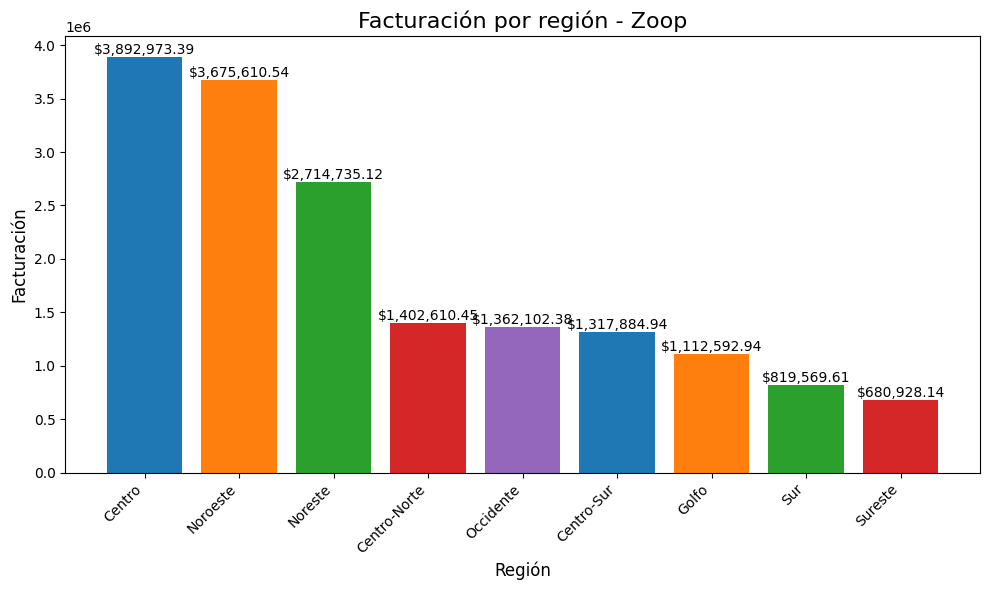

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1️⃣ Calcular facturación ---
df_concatenado["facturacion"] = (
    df_concatenado["precio_unitario"] * df_concatenado["cantidad"]
) + df_concatenado["envio"]

# --- 2️⃣ Agrupar por región ---
facturacion_region = df_concatenado.groupby("region")["facturacion"].sum().reset_index()

# --- 3️⃣ Ordenar de mayor a menor ---
facturacion_region = facturacion_region.sort_values(by="facturacion", ascending=False)

# --- 4️⃣ Crear gráfico con colores por defecto ---
plt.figure(figsize=(10,6))
barras = plt.bar(
    facturacion_region["region"],
    facturacion_region["facturacion"],
    color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
    #edgecolor="black"
)

# --- 5️⃣ Añadir etiquetas de valores ---
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        altura,
        f"${altura:,.2f}",
        ha="center", va="bottom", fontsize=10
    )

# --- 6️⃣ Personalizar ---
plt.title("Facturación por región - Zoop", fontsize=16)
plt.xlabel("Región", fontsize=12)
plt.ylabel("Facturación", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# --- 7️⃣ Mostrar ---
plt.show()

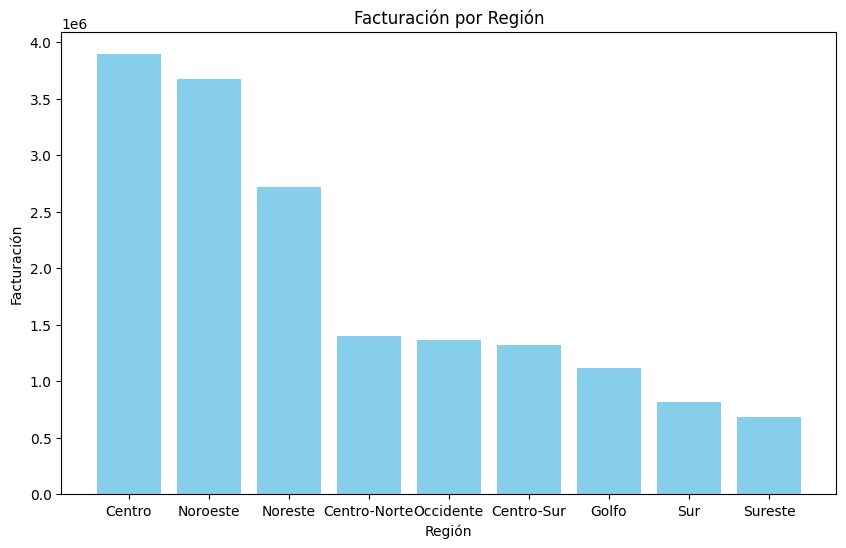

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df sea tu DataFrame
# Calcula la facturación para cada transacción
df_concatenado['facturacion'] = (df_concatenado['precio_unitario'] * df_concatenado['cantidad']) + df_concatenado['envio']

# Agrupa los datos por región y suma la facturación
facturacion_por_region = df_concatenado.groupby('region')['facturacion'].sum().reset_index()

# Ordena el resultado para una mejor visualización
facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)

# Creación del gráfico de columnas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'], color='skyblue')  # Grafica barras
plt.title('Facturación por Región')  # Añade título al gráfico
plt.xlabel('Región')  # Añade etiqueta al eje X
plt.ylabel('Facturación')  # Añade etiqueta al eje Y
plt.show()  # Muestra el gráfico

Desafío 2:

Zoop quiere realizar una campaña en los estados de México y Puebla, por lo que necesita conocer el perfil de su público según el sexo biológico. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la composición del público por sexo biológico en los estados de México y Puebla. Recuerda pedir que agrupe o apile los datos para la presentación.

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de columnas apiladas que presente la cantidad de personas por sexo biológico en relación con los estados de "México" y "Puebla".

En "df", tenemos las siguientes columnas:

- estado: estado del/de la cliente. Utilizaremos únicamente los estados de "México" y "Puebla"
- sexo_biologico: sexo biológico del/de la cliente

Deseamos crear una visualización que presente la cantidad de personas agrupadas por sexo biológico en los estados que definimos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

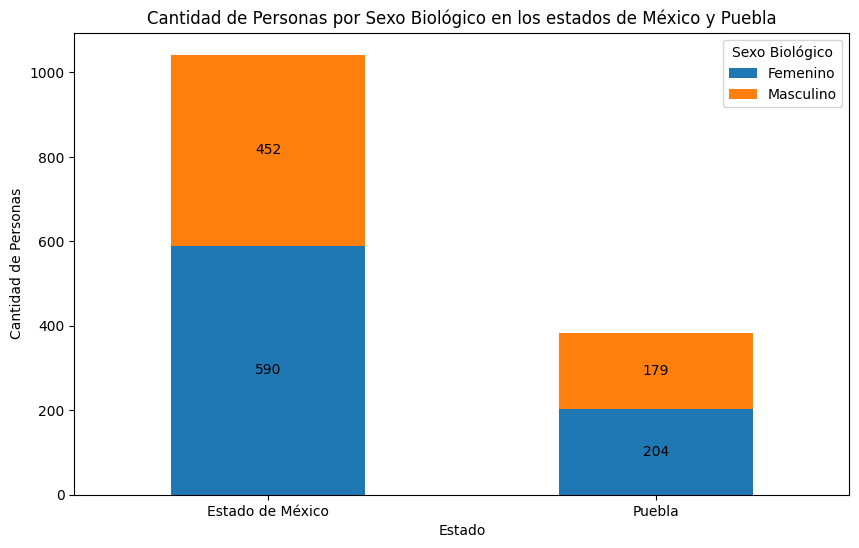

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo los estados de "México" y "Puebla"
df_filtrado = df_concatenado[df_concatenado['estado'].isin(['Estado de México', 'Puebla'])]

# Contar la cantidad de personas por sexo biológico y estado
contador_por_sexo_y_estado = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack(fill_value=0)

# Crear el gráfico de columnas apiladas
ax = contador_por_sexo_y_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de Personas por Sexo Biológico en los estados de México y Puebla')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)  # Mantén las etiquetas de los estados en horizontal para mejor legibilidad

# Mostrar valores en cada sección de la barra ---
for container in ax.containers:
    ax.bar_label(container, label_type="center")

# Mostrar la leyenda y el gráfico
plt.legend(title='Sexo Biológico')
plt.show()